In [59]:
import numpy as np
import pandas as pd

In [76]:
df_cl_sent_base = pd.read_csv('../data/processed/headlines_cl_sent_base.csv')
df_cl_sent = pd.read_csv('../data/processed/headlines_cl_sent.csv')

In [88]:
df_cl_sent['url'].iloc[3]

'https://www.netwerk24.com/ZA/Distrikspos/Nuus/big-apple-beckons-for-cilliers-20201118-2&sa=U&ved=2ahUKEwjorZSZypntAhVMExoKHbOGBAIQxfQBMAN6BAgHEAE&usg=AOvVaw1dlYB7K3BPLb4OTkZ72yEK'

In [86]:
df_cl_sent['headline'].iloc[3]

'Big Apple beckons for CilliersNetwerk24'

In [61]:
#df_cl_sent[df_cl_sent['site']=='aajtak.in']

In [62]:
print("Women related news")
df = df_cl_sent
print("This dataset has", len(df[df['country_of_pub']=='South Africa']), "headlines from South Africa", len(df[df['country_of_pub']=='India']), "headlines from India",
      len(df[df['country_of_pub']=='UK']), "headlines from the UK and", len(df[df['country_of_pub']=='USA']), "headlines from the U.S.")



Women related news
This dataset has 7810 headlines from South Africa 6604 headlines from India 10971 headlines from the UK and 22169 headlines from the U.S.


In [63]:
df_cl_sent_base['polarity'] = np.abs(df_cl_sent_base['compound_s'].values)
df_cl_sent['polarity'] = np.abs(df_cl_sent['compound_s'].values)

In [64]:
df_cl_sent_base = df_cl_sent_base[['site', 'country_of_pub', 'polarity']]
df_cl_sent = df_cl_sent[['site', 'country_of_pub',  'polarity']]

In [65]:
df_cl_sent_base.columns = ['site', 'country_of_pub', 'polarity_base']
df_cl_sent.columns = ['site', 'country_of_pub', 'polarity_women']

In [66]:
df_cl_sent_base = df_cl_sent_base.groupby(['site', 'country_of_pub']).mean().reset_index()
df_cl_sent = df_cl_sent.groupby(['site', 'country_of_pub']).mean().reset_index()

In [67]:
polarity_comparison = pd.merge(df_cl_sent_base, df_cl_sent, on = ['site', 'country_of_pub'])

In [68]:
polarity_comparison['difference'] = polarity_comparison['polarity_women'] - polarity_comparison['polarity_base']

TODO :
- Aaj tak is in Hindi. Scrape old data again for this. 
- Scrape old data again?

In [69]:
polarity_comparison.sort_values(by = 'polarity_base', ascending = False)[0:10]

,site,country_of_pub,polarity_base,polarity_women,difference
14,aajtak.in,India,0.501155,0.000000,-0.501155
39,dailystar.co.uk,UK,0.405107,0.397655,-0.007452
161,yahoo.com,USA,0.398656,0.285837,-0.112818
133,theblaze.com,USA,0.392968,0.383043,-0.009925
140,thesun.co.uk,UK,0.381614,0.362625,-0.018989
49,express.co.uk,UK,0.367856,0.314095,-0.053761
118,rt.com,USA,0.365768,0.369323,0.003555
38,dailyrecord.co.uk,UK,0.362521,0.464128,0.101607
36,dailycaller.com,USA,0.362366,0.293883,-0.068483
81,manchestereveningnews.co.uk,UK,0.360634,0.434016,0.073382


In [29]:
polarity_comparison.sort_values(by = 'polarity_women', ascending = False)[0:10]

,site,country_of_pub,polarity_base,polarity_women,difference
38,dailyrecord.co.uk,UK,0.362521,0.464128,0.101607
7,Ewn.co.za,South Africa,0.265800,0.453834,0.188034
19,birminghammail.co.uk,UK,0.292425,0.442649,0.150224
87,mirror.co.uk,UK,0.298589,0.436405,0.137816
81,manchestereveningnews.co.uk,UK,0.360634,0.434016,0.073382
95,news.sky.com,UK,0.302015,0.418851,0.116836
78,liverpoolecho.co.uk,UK,0.279502,0.415181,0.135679
30,chroniclelive.co.uk,UK,0.322342,0.399853,0.077511
39,dailystar.co.uk,UK,0.405107,0.397655,-0.007452
146,timesnownews.com,India,0.277199,0.394778,0.117579


In [30]:
polarity_comparison.sort_values(by = 'difference', ascending = False)[0:5]

,site,country_of_pub,polarity_base,polarity_women,difference
7,Ewn.co.za,South Africa,0.265800,0.453834,0.188034
12,Thesouthafrican.com,South Africa,0.200801,0.354110,0.153309
19,birminghammail.co.uk,UK,0.292425,0.442649,0.150224
104,outlookindia.com,India,0.244231,0.390315,0.146084
103,oneindia.com,India,0.208652,0.351767,0.143115


In [45]:
polarity_comparison[polarity_comparison['site']=='cnn.com']

,site,country_of_pub,polarity_base,polarity_women,difference
33,cnn.com,UK,0.263511,0.289615,0.026104


In [70]:
polarity_comparison = polarity_comparison[polarity_comparison['site']!='aajtak.in']

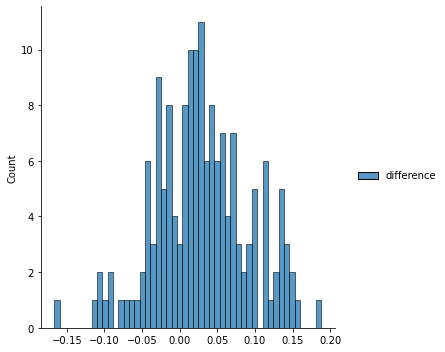

In [51]:
sns.displot(polarity_comparison[['difference']], kind="hist", bins = 50)

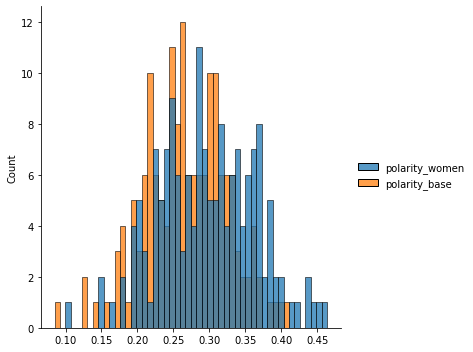

In [52]:
import seaborn as sns

sns.displot(polarity_comparison[['polarity_women', 'polarity_base']], kind="hist", bins = 50)

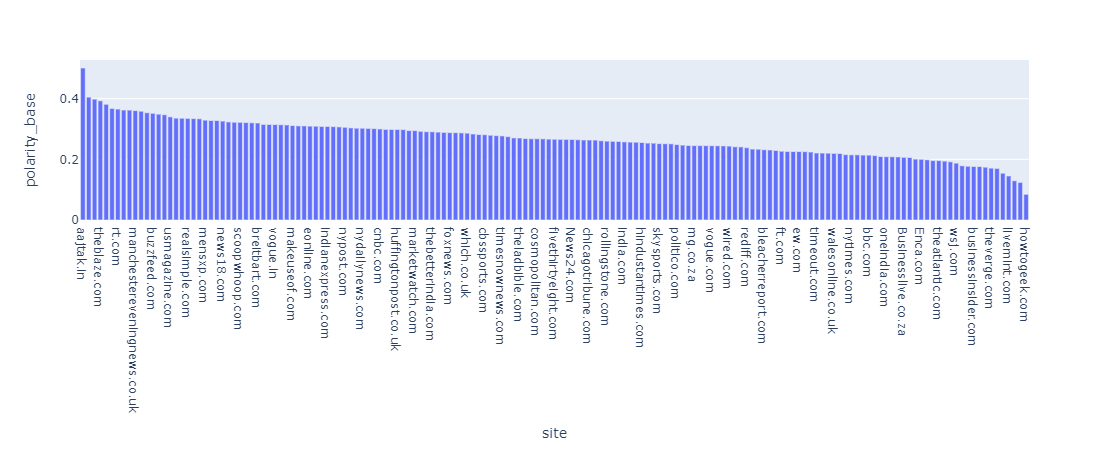

In [33]:
import plotly.express as px
fig = px.bar(polarity_comparison.sort_values(by = 'polarity_base', ascending = False), x = 'site', y ='polarity_base')
fig.show()

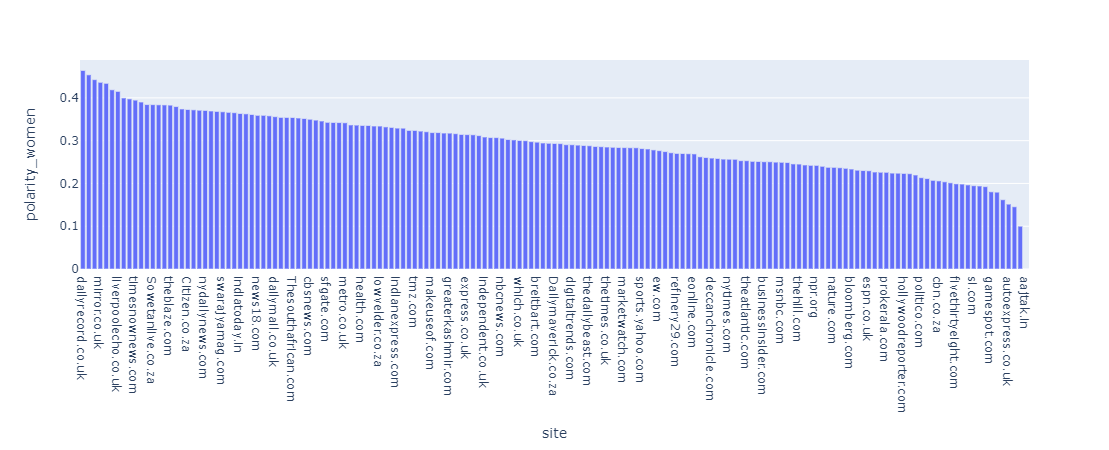

In [34]:
import plotly.express as px
fig = px.bar(polarity_comparison.sort_values(by = 'polarity_women', ascending = False), x = 'site', y ='polarity_women')
fig.show()

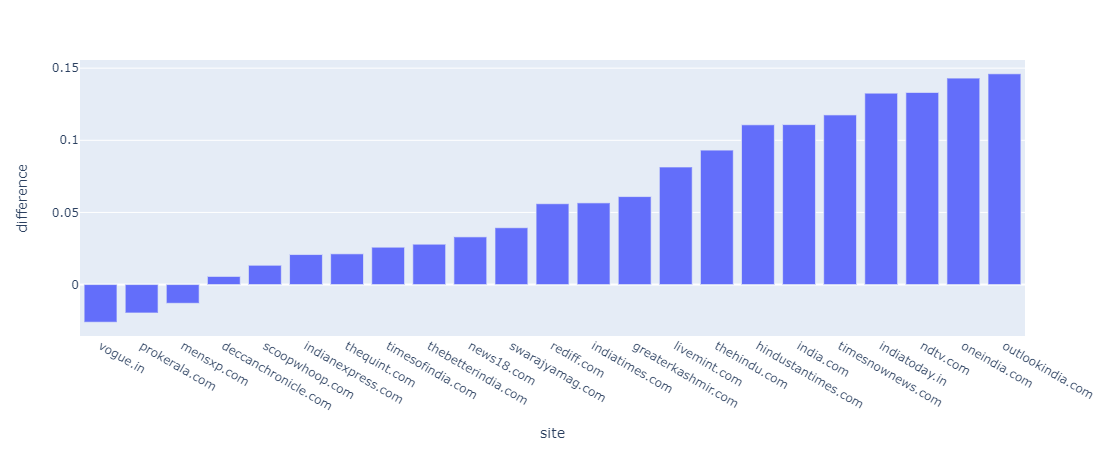

In [71]:
import plotly.express as px
df = polarity_comparison[polarity_comparison['country_of_pub']=='India']
df = df.sort_values(by = 'difference', ascending = True)
fig = px.bar(df, x = 'site', y ='difference')
fig.show()

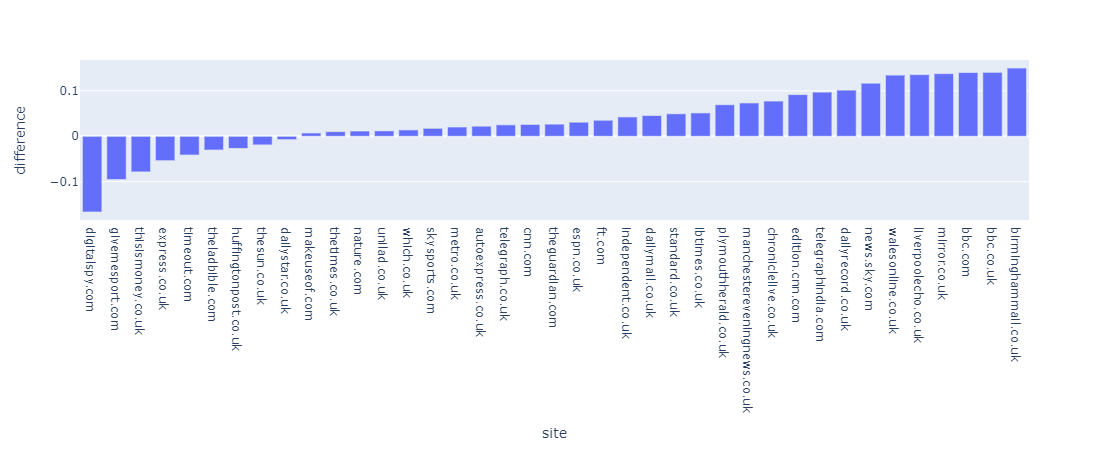

In [75]:
import plotly.express as px
df = polarity_comparison[polarity_comparison['country_of_pub']=='UK']
df = df.sort_values(by = 'difference', ascending = True)
fig = px.bar(df, x = 'site', y ='difference')
fig.show()

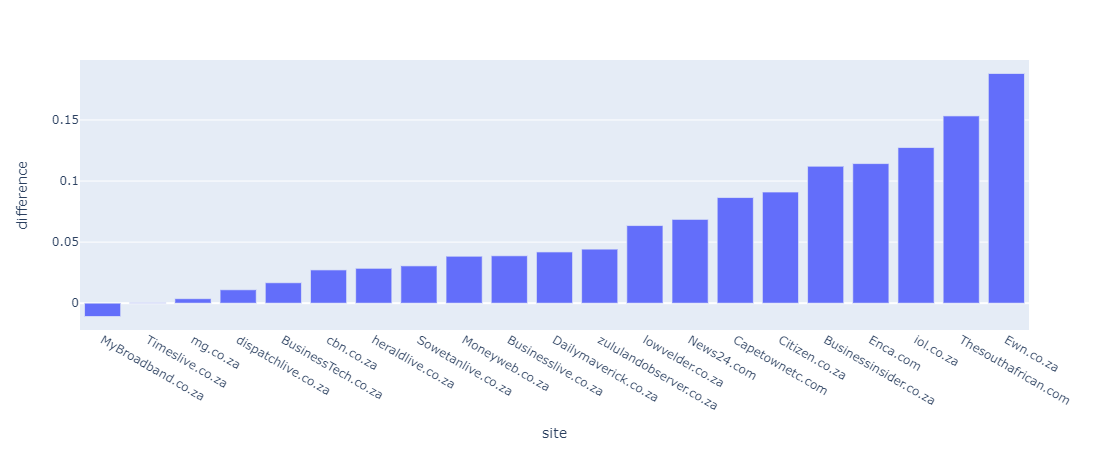

In [74]:
import plotly.express as px
df = polarity_comparison[polarity_comparison['country_of_pub']=='South Africa']
df = df.sort_values(by = 'difference', ascending = True)
fig = px.bar(df, x = 'site', y ='difference')
fig.show()

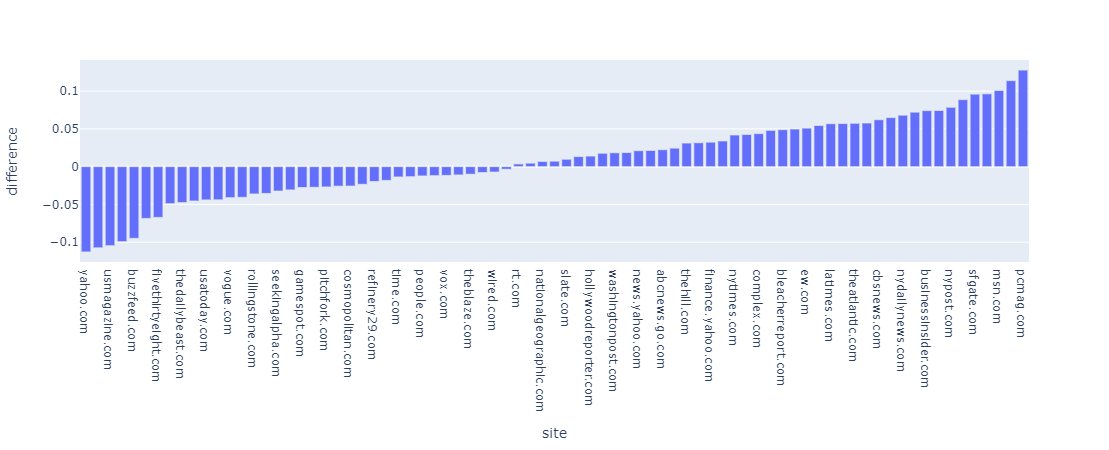

In [72]:
import plotly.express as px
df = polarity_comparison[polarity_comparison['country_of_pub']=='USA']
df = df.sort_values(by = 'difference', ascending = True)
fig = px.bar(df, x = 'site', y ='difference')
fig.show()

In [12]:
df_cl_sent_base.shape

(8049, 17)